In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# A Crash Course In Information & Entropy

### Information

Gibbs and Shannon taught us that the likelihood of an event (according to a hypothesis) is encapsulated in the amount of useful information (according to a hypothesis) present it's observation.

"The information in an event scales with the amount of surprise upon it's observation."

Let's imagine you're computing information in bits, and $\rho$ was the uniform distribution on binary sequences of length $n$. 

In this case, the information contained in a single string $S$ coincides with it's length. This happens to the be: 

$$
\mathcal{I}_\rho(S) = \log_2((.5^n)^{-1}) = -\log_2{(.5^n)} = n
$$
For example, "$010$" contains 3 bits.

In NLP, the inverse document frequency of a term is the amount of useful information gained upon learning that a document contains that term. Note that term can include a word along with its mispellings as synonyms. 

More generally, for any possible event $x$:

$$
\mathcal{I}_{\rho}(x) = \log\Bigl(\frac{1}{p(x)}\Bigl) = - \log(p(X)) 
$$

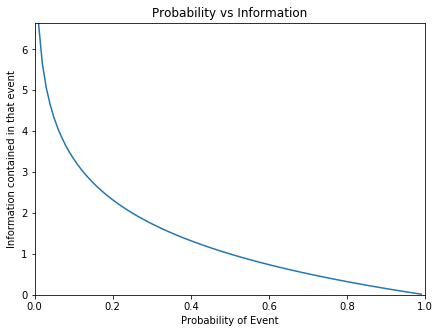

In [10]:
p = np.linspace(0.01, 0.99, 100)
I = -np.log2(p)
p_v_inf_fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.plot(p, I)
ax.set(
    xlim=(0, 1),
    ylim=(0, I.max()),
    xlabel="Probability of Event",
    ylabel="Information contained in that event",
    title="Probability vs Information",
);
#plt.show()

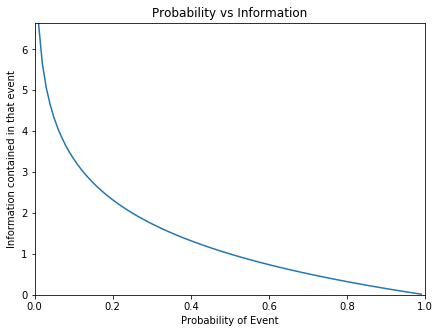

In [8]:
display(p_v_inf_fig)

The choice of a base is a choice of units, and can be recovered by examining the information of heads in a fair coin toss. 

Note that information is in some sense dual to likelihood/probability:

* High likelihoood events have litle (useful!) information. 
    * Knowing it's not going to rain next saturday has little useful information if you live in a desert
    * $2 + 2 = 4$ (which we're certain is true) has zero information

* Low likelihood events have 
    * Knowing it's going to be sunny next saturday has a lot of useful information if you live in Seattle
    * $2 + 2 \neq 4$ has an infinite amount of information 
 

## Entropy 
The entropy is just the expected amount of information $\rho$ contains:

$$
\mathcal{S}(\rho) =  \langle  \mathcal{I}_{\rho} \rangle_{\rho} = \mathbb{E}_{\rho}[\mathcal{I}_{\rho}]
$$
where, $\mathbb{E}_\rho[X] = \langle X \rangle_\rho$ denotes the expectation value of the function (i.e. 'random variable') $X$ with respect to the distribution $\rho$. 

Below is the a graph of a biased coin toss:


In [14]:
p = np.linspace(0.01, 0.99, 100)
q = 1 - p
ent = -p * np.log2(p) - q * np.log2(q)

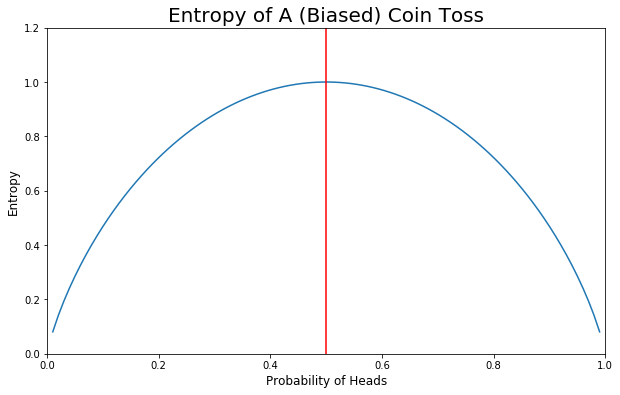

In [15]:
b_c_ent_fig = plt.figure(figsize=(10, 6))
ax = plt.axes()
fig.axis = "equal"
ax.plot(p, ent)
ax.set_title("Entropy of A (Biased) Coin Toss", fontsize = 20)
ax.set_xlabel("Probability of Heads", fontsize = 12)
ax.set_ylabel('Entropy', fontsize = 12)
ax.set(
    xlim=(0, 1),
    ylim=(0, 1.2),
)
ax.axvline(0.5, color="r");

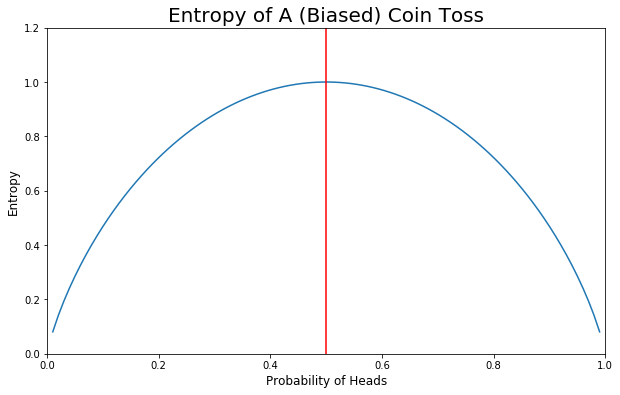

In [17]:
b_c_ent_fig

Note that the entropy is maximized when the coin is fair! 

Moreover, note that entropy is minimized when the coin has no randomness! This is the first indication that we can think of entropy as quantifying the amount of uncertainty in a system. 

## Entropy of a Normal Distribution

For a(n univariate) normal distribution $\mathcal{N}(\mu, \sigma)$, the amount of information (in "natural units") is easy to compute:

$$
\mathcal{I}_{\mathcal{N}(\mu, \sigma)}(x) = \frac{1}{2} \Bigl(\frac{x - \mu}{\sigma}\Bigl)^2 - \log( \sigma\sqrt{2 \pi})
$$

The entropy of a univariate normal distribution (in bits) is gorgeous: 

$$
\mathcal{S}\bigl(\mathcal{N}(\mu, \sigma) \bigl)= \log_2 ( \sigma) + \log_2 ( \sqrt{2e\pi})  
$$

(In general, entropy is translation invariant)

The formula for a multivariate Gaussian is analagous but more complex. What's most interesting is a manifestation of the curse of dimensionality:

$$
\mathcal{S}\bigl(\mathcal{N}(0, \mathbb{1}_n) \Bigl)= n \cdot \mathcal{S}\big(\mathcal{N}(0, 1) \bigl)
$$

So that the entropy of a unit normal scales linearly with the dimension.

A general fact is that normal distributions maximize the entropy amongst all distributions with a fixed mean and variance. 

More generally, all exponential families (e.g. Boltzman distributions, exponential, multinomial, ...) arise by a similar "Maximum Entropy Principle."

## Entropy & Dependency between Variables

If event X is independent of event Y, of the amount of information present in seeing both of them is the information contained in seeing X plus the information contained in seeing Y.

At the level of expectation values, we obtain a heuristic expression:
$$
\mathcal{S}(X, Y)  = \mathcal{S}(X) + \mathcal{S}(Y)
$$

This additivity *characterizes* independence. If they are highly correlated, this is no longer the case: you're "overestimating" the entropy:
$$
\mathcal{S}(X, Y) \leq \mathcal{S}(X) + \mathcal{S}(Y) 
$$
In other words, dependence between variables decreases entropy.

### Mutual Information 

This overestimation is referred to as the mutual information between $X$ and $Y$:

$$
I(X, Y) = \mathcal{S}(X) + \mathcal{S}(Y) - \mathcal{S}(X,Y)
$$

Note that the sum of the first two terms is the Entropy of X and Y assuming they were independent. Therefore, the mutual information is how much you overestimated the average amount of information were you to assume they were independent. 

There is another formulation, which is that the mutual information is just the entropy of $X$ ("marginal") minus the amount of information in $X$ when $Y$ is known ("conditional").

#### Example: "Noisy Channel"


In signal processing, mutual information quantifies to what extent one is system is the signal/receiver for another.

For example, $X$ could be the presence of a certain type of stimuli, and $Y$ could be the activation of a neuron some time later. In this case, a low amount of mutual information rejects the hypothesis that $X$ can be considered as a stimuli for $Y$. 


Lets' imagine the stimuli $X$ and $Y$ can only take two states $x_0, x_1$ and $y_0, y_1$. Moreover, let's for simplicity, let's assume that:

$$
P(y_0 | x_0) = P(y_1 | x_1) = p
$$
As we have control over the stimuli, let's assume that:
$$
P(x) = \frac{1}{2} 
$$
(i.e. for simplicity assume it's in a maximally entropic state). This is visualized as:

Therefore, the mutual information is a function of a single variable $P$, which we can think of as the "strength of the signal". When $p \neq 1$, the channel is "noisy". 

Below is a graph of the mutual information. This can be obtained using the plug and chug method. Equivalently, symmetry arguments can be used to show that the mutual information is: 
$$
1 - \mathcal{S}(p, 1-p)
$$
Where the second term is the entropy in $Y$ (the response) when $X$ (the stimuli) is known. 

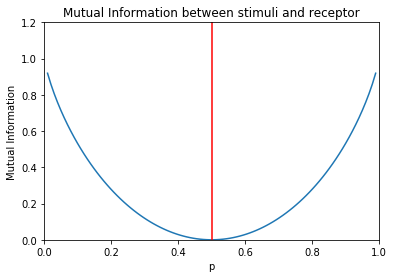

In [6]:
fig = plt.figure()
ax = plt.axes()

q = np.linspace(0.001, .999)
I = 1 - ent

ax.plot(p, I)
ax.set(
    xlim=(0, 1),
    ylim=(0, 1.2),
    xlabel="p",
    ylabel="Mutual Information",
    title="Mutual Information between stimuli and receptor",
)
ax.axvline(0.5, color="r");
;
;

Note that now the mutual information is *minimized* when the channel is the "noisiest. The mutual information is maximized when $p = 0$ or $p = 1$, in which case it is 1.

More generally, there is some one-to-one correspondence between $X$ and $Y$:

$$
\frac{I(X, Y)}{\sqrt{\mathcal{S}(X)\mathcal{S}(Y)}} = 1
$$

Indicating that they are in some sense "perfectly correlated". Above, the one-to-one correspondence is $x_i \leftrightarrow y_i$ when $p = 1$

This quantity should be thought of as analogous to a Pearson correlation coefficient.


#### Example: Correlated Gaussians

Let's say we're  a 2D gaussian with features $X$ and $Y$ with Pearson correlation coefficient $\rho_{XY}$ and equal standard deviations. In this case, the mutual information takes on an elegant form: 

$$
-\frac{1}{2} \log (1 - \rho_{XY}^2)
$$


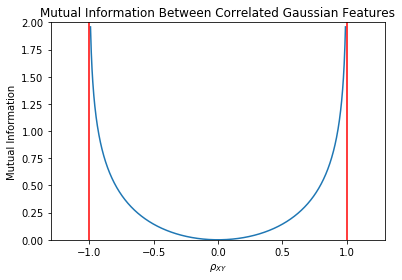

In [7]:
cc = np.linspace(-0.99, 0.99, 10 ** 3)
I = -0.5 * np.log(1 - cc ** 2)

fig = plt.figure()
ax = plt.axes()

ax.plot(cc, I)
ax.set(
    xlim=(-1.3, 1.3),
    ylim=(0, 2),
    xlabel="$\\rho_{XY}$",
    ylabel="Mutual Information",
    title="Mutual Information Between Correlated Gaussian Features",
)
ax.axvline(1, color="r")
ax.axvline(-1, color="r")
plt.show()

In other words:

* "perfectly correlated" Gaussian features have infinite mutual information!
* Independent features has no mutual information.
   
This gives a conceptual, heuristic interpretation of Principal Component Analysis: you're finding composite features which contain no information about each other. 

## Relative Entropy (a.k.a Kullback-Liebler (KL) Divergence) 

Note that mutual information is about comparing two distributions: the "real" distribution" and the distribution which assume the features are independent. In other words mutual information is a "relative" notion of entropy. 

There are many ways to compare distributions. We'll concentrate on relative entropy, as it's the one most relevant to AB-testing and machine learning. 

Conceptually, it scales inversing with the capacity to st
* High relative entropy indicates that it's easier to statistically distinguish between the two.
* Low relative entropy indicates that it's harder to statistically distinguish between the two.

### Example of Relative Entropy: Biased Coin

We'd like to understand the relative entropy between two coin tosses: $(p_A, 1-p_A)$ and $(p_B, 1 - p_B)$.

We'll denote this quantity as:

$$
\mathcal{D}\bigl(p_A || p_B \bigl)
$$


In [135]:
def bias_coin(p):
    q = np.linspace(0.01, 0.99, 10 ** 4)
    relent = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))

    plt.figure(figsize=(10, 7))
    ax = plt.axes()
    ax.plot(q, relent, label="$\mathcal{D}(p_A || p_B )$")
    ax.axvline(p, linestyle="--", color="Red", label="$p_A$")
    ax.set_title("Relative Entropy Between Biased Coins ", fontsize=25)
    ax.set_xlabel("$p_B$", fontsize=15)
    ax.set_ylabel("Entropy of $p_A$ relative to $p_B$", fontsize=15)
    plt.legend()
    plt.show()


pwidget = widgets.FloatSlider(
    min=0.01, max=0.99, step=0.05, value=0.75, description="$p_A$"
)
biased_coin_rel_ent_widget = widgets.interactive(bias_coin, p=pwidget)
biased_coin_rel_ent_widget

interactive(children=(FloatSlider(value=0.75, description='$p_A$', max=0.99, min=0.01, step=0.05), Output()), …

Note that as the relative entropy decreases as the two coins become increasingly similar, and vanishes when they are identical! Moreover, it becomes infinite as the coin becomes "deterministic"!

### The  Definition of Relative Entropy

Recall that given two distributions $\rho_A$ and $\rho_B$, the relative entropy (alias Kullback-Liebler (KL) Divergence) of $\rho_A$ versus $\rho_B$ is:

$$
\begin{align*}
\mathcal{D}(\rho_{A} \lvert \rvert \rho_B ) &:= \langle \mathcal{I}_{\rho_{B}} -  \mathcal{I}_{\rho_{A}} \rangle_{\rho_A} \\
&= \langle \mathcal{I}_{\rho_{B}}\rangle_{\rho_{A}} - \mathcal{S}(\rho_{A})
\end{align*}
$$

The first terms is the average amount of information according to B, while the second term is the average information of A, "were A true". 

Plugging this expression into the definition of the relative entropy shows that:
$$
\begin{align*}
\mathcal{D}(\rho_{A} \lvert \rvert \rho_{B} ) &= \int \rho_{A}(x) \bigl[\log(\rho_{A}(x) - \log(\rho_{B}(x) \bigl] \mathrm{d}x\\
&= \int  \rho_{A}(x) \cdot \log \bigl( \frac{\rho_{A}(x)}{\rho_{B}(x)} \bigl) \mathrm{d}x
\end{align*} 
$$

We are adopting the notation that integration over a finite set is summation. 

This formula permits the computation and algebraic manipulation of this quantity. It can get really messy really easy....

### General Facts on Relative Entropy
A not-so-obvious theorem states that:

$$
\mathcal{D}(\rho_{A} \lvert \rvert \rho_{B} ) \geq 0
$$

*with equality if and only if $\rho_A = \rho_B$*!

The first part says that on average, any "incorrect" $\rho_B$ overestimates the amount of information.

The second part is that the relative entropy is sensitive enough to detect whether two distributions are equal. In other words, if you want to show that two distributions are the same, it suffices to show the vanishing of their relative entropy.

Moreover, the relative entropy is additive as we increase the sample size:

$$
\mathcal{D}(\rho_{A}^{\times n} \lvert \rvert \rho_{B}^{\times n}) = n \cdot \mathcal{D}(\rho_{A} \lvert \rvert \rho_{B})
$$

where $\rho^{\times n}$ is the distribution naturally associated to $n$ i.i.d. samples of $\rho$. In other words, distinct distributions become increasingly dissimilar as one increases the sample size. 

If you examine the definition of relative entropy, one would correctly guess that, unless some miracle occurs, it's not symmetric. 

As we will see, this reflects the asymmetry between the null and the alternative hypothesis. More generally, the asymmetry in data-driven decision making

We now move on to a concrete

### Example of Relative Entropy: Normal Distributions:

The following comes from a joyous and rewarding computation: the world would be a statistically insignificantly better place if everyone could do that computation with a leisurely engagement lasting less than 15 minutes.

$$
\mathcal{D}\bigl(\mathscr{N}(\mu_{A}, \sigma) || \mathscr{N}(\mu_{B}, \sigma) \bigl) = \frac{1}{2} \Bigl( \frac{\mu_{B} - \mu_{A}}{\sigma} \Bigl)^2
$$

Note that increasing the standard deviation *decreases* the relative entropy 

As this example suggests, the relative entropy behaves most closely to the *squared* distance.  



This computation suggests that relative entropy has something to do with hypothesis testing, as:

$$
\frac{\partial}{\partial \mu_{B}} \mathcal{D}\bigl(\mathscr{N}(\mu_{A},\sigma^2) \lvert \rvert \mathscr{N}(\mu_{B}, \sigma^2) \bigl) = \frac{\mu_{A} - \mu_{B}}{\sigma}
$$

In other words, the effect size gives the rate of change in the relative entropy as we change the specifics of our hypothesis of B. 

As the effect score has something to do with power analysis, this suggests that relative entropy has something to do with optimal sample size to achieve a desired power. This is true for large samples and highly significant tests!


The formula for the case of a unequal standard deviations is a bit more involved. In lieu of writing the formula, here is a helpful widget to get a sense of it's behavior.

In [136]:
def normals(mu_A, sigma_A, mu_B, sigma_B):
    plt.figure(figsize=(10, 7))
    ax = plt.axes()
    rel_entropy = (
        -np.log(sigma_B / sigma_A)
        + 0.5 * ((mu_A - mu_B) ** 2 + sigma_B ** 2) / sigma_A ** 2
        - 0.5
    )
    rel_entropy = np.round(rel_entropy, decimals=2)
    rel_entropy = str(rel_entropy)
    x = np.linspace(-10, 10, 1000)
    norm_A = norm(mu_A, sigma_A)
    norm_B = norm(mu_B, sigma_B)
    ax.plot(x, norm_A.pdf(x), label="Distribution A", color="Blue")
    ax.plot(x, norm_B.pdf(x), label="Distribution B", color="Red")
    ax.fill_between(x, norm_B.pdf(x), 0, facecolor="Red", interpolate=True)
    ax.fill_between(x, norm_A.pdf(x), 0, facecolor="Blue", interpolate=True)
    ax.axvline(mu_A, linestyle="--", color="Blue")
    ax.axvline(mu_B, linestyle="--", color="Red")
    ax.set_title("$\mathcal{D}(p_A || p_B)$ = " + rel_entropy, fontsize=25)
    ax.set(xlim=(-12, 12), ylim=(0, 0.8))

    plt.legend()
    plt.show()
    return


mu_A_slider = widgets.FloatSlider(value=0, min=-8, max=8, description="Mean of A")
sigma_A_slider = widgets.FloatSlider(value=1, min=0.1, max=4, description="STD of A")
mu_B_slider = widgets.FloatSlider(value=1, min=-8, max=8, description="Mean of B")
sigma_B_slider = widgets.FloatSlider(value=1, min=0.1, max=4, description="STD of B")

mui = widgets.HBox([mu_A_slider, mu_B_slider])
sui = widgets.HBox([sigma_A_slider, sigma_B_slider])


norm_rel_ent_widget = widgets.interactive_output(
    normals,
    {
        "mu_A": mu_A_slider,
        "mu_B": mu_B_slider,
        "sigma_A": sigma_A_slider,
        "sigma_B": sigma_B_slider,
    },
)
display(mui, sui, norm_rel_ent_widget)

Output()

### Relative Entropy in the Context of Machine Learning

A ultimate dream goal of ML is to create a model a phenomena which is statistically indistinguishable from what it's trying to model.

For example, in logistic regression, given data $X = ((x_1, y_1), \ldots, (x_n, y_n))$, with empirical distribution distribution $\rho_{XY}$, one is minimizing:

$$
\mathcal{D}(\rho_{XY} || \rho_\beta )
$$


In other words, you're "projecting" the empirical distribution onto a parametric family of distributions. This is the "Maximum Likelihood Principle" of statistical inference.



### Take-Home

Express the $\beta$s in logistic regression in terms of a difference of information between the positive and negative classes. 